<a href="https://colab.research.google.com/github/developerMehul755/AIRL_Coding_Assignment/blob/main/q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cloning the githbub repo of GroundingDino and installing the required dependencies.

In [ ]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO/
!pip install -q -e .

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Total 463 (delta 0), reused 0 (delta 0), pack-reused 463 (from 1)
Receiving objects: 100% (463/463), 12.91 MiB | 9.79 MiB/s, done.
Resolving deltas: 100% (220/220), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 12.9 MB/s eta 0:00:00


### We now download the GroundingDino pre-trained model's weights

In [ ]:
!mkdir weights
%cd weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
%cd ..

/content/GroundingDINO/weights
/content/GroundingDINO


### Cloning the github repo of SAM2 model and installing the required dependencies

In [ ]:
%cd ..
!git clone https://github.com/facebookresearch/segment-anything-2.git
%cd segment-anything-2
!pip install -q -e .

/content
Cloning into 'segment-anything-2'...
remote: Enumerating objects: 1070, done.
remote: Total 1070 (delta 0), reused 0 (delta 0), pack-reused 1070 (from 1)
Receiving objects: 100% (1070/1070), 128.11 MiB | 24.40 MiB/s, done.
Resolving deltas: 100% (380/380), done.
/content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.1 MB/s eta 0:00:00
  Building editable for SAM-2 (pyproject.toml) ... done


### We also need to download the pre-trained SAM2 model checkpoints.

In [ ]:
%cd segment-anything-2
!mkdir -p checkpoints/
!wget -P checkpoints/ https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt
%cd ..

[Errno 2] No such file or directory: 'segment-anything-2'
/content/segment-anything-2
--2025-10-01 16:04:45--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.33.183.115, 13.33.183.33, 13.33.183.121, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.33.183.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 898083611 (856M) [application/vnd.snesdev-page-table]
Saving to: ‘checkpoints/sam2.1_hiera_large.pt’

sam2.1_hiera_large. 100%[===================>] 856.48M   155MB/s    in 5.3s    

2025-10-01 16:04:51 (161 MB/s) - ‘checkpoints/sam2.1_hiera_large.pt’ saved [898083611/898083611]

/content


In [ ]:
%cd ..

/


### Importing some important libraries

In [ ]:
%cd /content/GroundingDINO
from groundingdino.util.inference import load_model, load_image, predict, annotate

/content/GroundingDINO


In [ ]:
%cd /content/segment-anything-2
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

/content/segment-anything-2


In [ ]:
%cd /content
import cv2
import os
import torch
from torchvision.ops import box_convert
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request
from torchvision import transforms

/content


### We first explore GroundingDino method that takes image and text prompt and output a list of bounding boxes that matches the prompt.

In [ ]:
# Loading pre-trained model
model = load_model("GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "GroundingDINO/weights/groundingdino_swint_ogc.pth")

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### Requesting image from cocodataset

In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
urllib.request.urlretrieve(url, "cats.jpg")

('street.jpg', <http.client.HTTPMessage at 0x7f8aa77fd6d0>)

### Loading image and transforming it into resized tensors suitable for box prediction

In [ ]:
image_source = Image.open("cats.jpg").convert("RGB")
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
])
image = transform(image_source)
image_source = np.array(image_source)

In [ ]:
TEXT_PROMPT = "cats. remote. "
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

### Using predict() function that we imported earlier to predict the bounding boxes based on input prompt

In [ ]:
boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device='cpu'
)

### We can use the annotate() function to create an image with the output bounding boxes and their respective category names and confidence scores.

In [ ]:
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

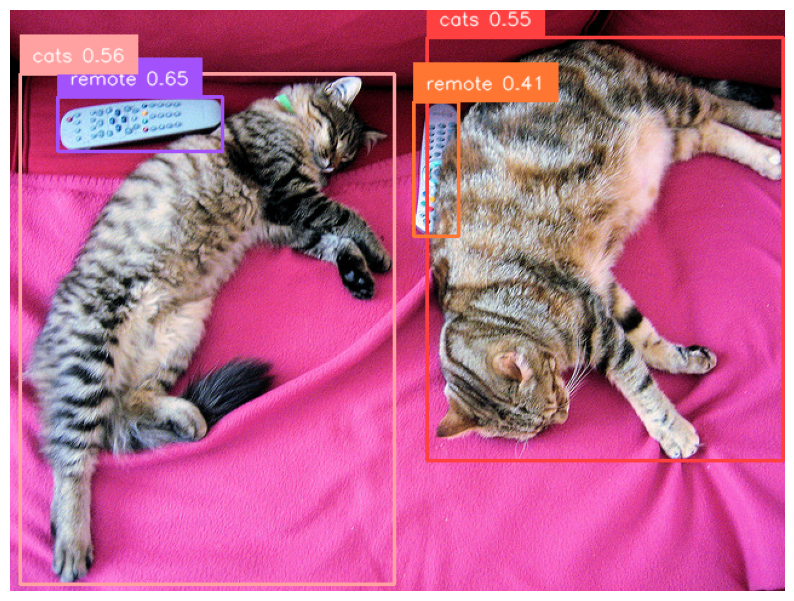

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Before passing these boxes to our SAM2 model, we need to do some modifications to the format of the bounding boxes

In [ ]:
h, w, _ = image_source.shape
boxes_unnorm = boxes * torch.Tensor([w, h, w, h]) #unnormalizing the range of boxes
boxes_xyxy = box_convert(boxes=boxes_unnorm, in_fmt="cxcywh", out_fmt="xyxy").numpy() #converting to xyxy format

In [ ]:
%cd /content/segment-anything-2

/content/segment-anything-2


### Load the pre-trained SAM2 model. Here we choose hiera_large model, so we specify its corresponding checkpoints that we downloaded earlier.We then create a SAM2 model and a predictor to predict the segments

In [ ]:
sam2_checkpoint = "checkpoints/sam2.1_hiera_large.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_l.yaml"

sam2_model = build_sam2(model_cfg, sam2_checkpoint, device='cpu')

predictor = SAM2ImagePredictor(sam2_model)

### Define some helper function responsible for plotting the result

In [ ]:
np.random.seed(3)

def show_mask(mask, ax, random_color = False, borders = True):
  if random_color:
    color = np.concatenate([np.random.random(3), np.array([0.6])], axis= 0)
  else:
    color = np.array([30/255, 144/255, 255/255, 0.6])
  h, w = mask.shape[-2:]
  mask = mask.astype(np.uint8)
  mask_image =  mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
  if borders:
        import cv2
        contours, _ = cv2.findContours(mask,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        # Try to smooth contours
        contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
        mask_image = cv2.drawContours(mask_image, contours, -1, (1, 1, 1, 0.5), thickness=2)
  ax.imshow(mask_image)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0, 0, 0, 0), lw=2))

In [ ]:
image = Image.open('/content/cats.jpg')
image = np.array(image.convert("RGB"))
predictor.set_image(image)

In [ ]:
masks, scores, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=boxes_xyxy,
    multimask_output=False,
)

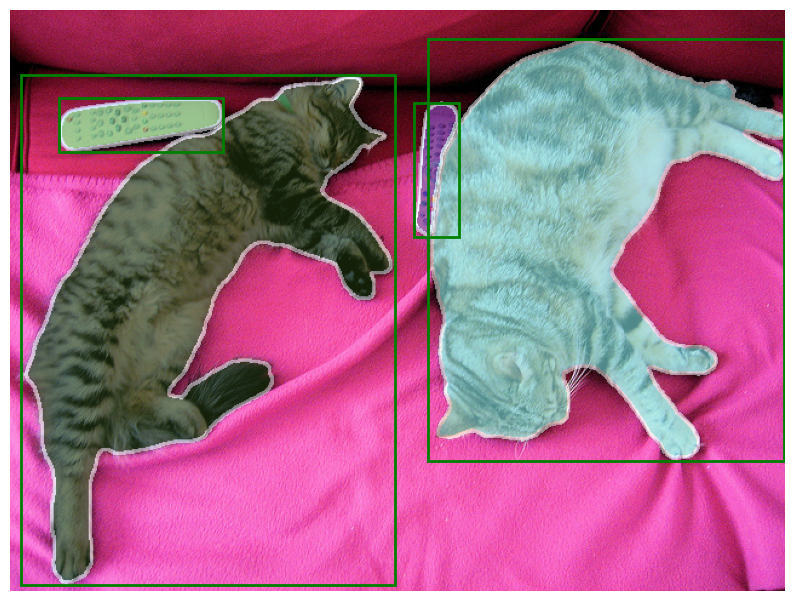

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
for mask in masks:
    show_mask(mask.squeeze(0), plt.gca(), random_color=True)
for box in boxes_xyxy:
    show_box(box, plt.gca())
plt.axis('off')
plt.savefig("desk-segment.jpg")
plt.show()

# Putting GroundingDINO And SAM2 Together

In [ ]:
model = load_model("../GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "../GroundingDINO/weights/groundingdino_swint_ogc.pth")
sam2_model = build_sam2("configs/sam2.1/sam2.1_hiera_l.yaml", "checkpoints/sam2.1_hiera_large.pt", device='cpu')

final text_encoder_type: bert-base-uncased


## Definig a single function which takes input a image path, text_prompt and show you the segmented region in the image on the basis of prompt.

In [ ]:
def segment_with_prompt(image_path, text_prompt, model = model, predictor = predictor, box_threshold = 0.35, text_threshold = 0.25):
  image_source, image = load_image(image_path)

  boxes, logits, phrases = predict(
      model = model,
      image = image,
      caption = text_prompt,
      box_threshold = box_threshold,
      text_threshold = text_threshold,
      device = 'cpu'
  )

  annoted_frame = annotate(image_source = image_source, boxes = boxes, logits = logits, phrases = phrases)

  plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(annoted_frame, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

  h, w, _ = image_source.shape
  boxes_unnorm = boxes * torch.Tensor([w, h, w, h])
  boxes_xyxy = box_convert(boxes=boxes_unnorm, in_fmt="cxcywh", out_fmt="xyxy").numpy()

  image = Image.open(image_path)
  image = np.array(image.convert("RGB"))
  predictor.set_image(image)

  masks, scores, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=boxes_xyxy,
        multimask_output=False,
  )

  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  for mask in masks:
      if len(mask.shape) > 2:
            show_mask(mask.squeeze(0), plt.gca(), random_color=True)
      else:
            show_mask(mask, plt.gca(), random_color=True)
  for box in boxes_xyxy:
      show_box(box, plt.gca())
  plt.axis('off')
  plt.show()

  return masks

In [ ]:
%cd ..

/content


# Text-based Video Segmentation task

### Download and store video file in the current directory

In [ ]:
import requests
import os

video_url = "https://www.pexels.com/download/video/3987730/"
output_filename = "Horse_running.mp4"

response = requests.get(video_url, stream=True, allow_redirects=True)

if response.status_code == 200:
    with open(output_filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=1024*1024):
            if chunk:
                f.write(chunk)
    print(f"✅ Video downloaded successfully and saved as '{output_filename}'")
else:
    print(f"❌ Failed to download video. Status code: {response.status_code}")
    print("This can sometimes happen with temporary links. Please try again or check the URL.")

✅ Video downloaded successfully and saved as 'Horse_running.mp4'


In [ ]:
output_dir = "segmented_frames"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
frame_dir = "frames"
os.makedirs(frame_dir, exist_ok=True)

### Extracts all frames from a video file and saves them as individual image files in a specified directory.

In [ ]:
cap = cv2.VideoCapture(output_filename)
frame_count = 0
while True:
  ret, frame = cap.read()
  if not ret:
    break
  frame_filename = os.path.join(frame_dir, f"{frame_count:05d}.jpeg")
  cv2.imwrite(frame_filename, frame)
  frame_count += 1
cap.release()

### Loading another SAM2 model and GroundingDino model

In [ ]:
%cd /content/segment-anything-2
sam2_model_2 = build_sam2("configs/sam2.1/sam2.1_hiera_l.yaml", "checkpoints/sam2.1_hiera_large.pt", device='cpu')
model_2 = load_model("../GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "../GroundingDINO/weights/groundingdino_swint_ogc.pth")
predictor_2 = SAM2ImagePredictor(sam2_model_2)

/content/segment-anything-2
final text_encoder_type: bert-base-uncased


In [ ]:
def segment_with_prompt_2(image_path, text_prompt, model = model_2, predictor = predictor_2, box_threshold = 0.35, text_threshold = 0.25):
  image_source, image = load_image(image_path)

  boxes, logits, phrases = predict(
      model = model,
      image = image,
      caption = text_prompt,
      box_threshold = box_threshold,
      text_threshold = text_threshold,
      device = 'cpu'
  )
  h, w, _ = image_source.shape
  boxes_unnorm = boxes * torch.Tensor([w, h, w, h])
  boxes_xyxy = box_convert(boxes=boxes_unnorm, in_fmt="cxcywh", out_fmt="xyxy").numpy()

  image = Image.open(image_path)
  image = np.array(image.convert("RGB"))
  predictor.set_image(image)

  masks, scores, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=boxes_xyxy,
        multimask_output=False,
  )

  return masks

### Segments the first frame of the video using a text prompt and SAM 2, returning the mask for the specified object to use as a reference for mask propagation.

In [ ]:
first_frame_path = os.path.join('/content/frames', "00000.jpeg")
prompt = "horse"
masks = segment_with_prompt_2(first_frame_path, prompt, model = model_2, predictor = predictor)
base_mask = masks[0]

In [ ]:
base_mask.shape

(1, 1080, 1920)

### Propagates the first frame’s object mask to subsequent frames, overlays it in red, and saves each frame as an image.

In [ ]:
for i in range(200):
    frame_path = os.path.join("/content/frames", f"{i:05d}.jpeg")
    image = Image.open(frame_path).convert("RGB")
    image_np = np.array(image)

    y_indices, x_indices = np.where(base_mask)[1:]
    if len(x_indices) == 0 or len(y_indices) == 0:
        continue
    x_min, x_max = x_indices.min(), x_indices.max()
    y_min, y_max = y_indices.min(), y_indices.max()
    box_xyxy = np.array([[x_min, y_min, x_max, y_max]])

    predictor.set_image(image_np)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=box_xyxy,
        multimask_output=False,
    )

    mask_rgb = np.zeros_like(image_np)
    mask_rgb[:, :, 0] = masks[0] * 255  # Red overlay
    alpha = 0.5
    overlayed = cv2.addWeighted(image_np, 1, mask_rgb, alpha, 0)

    out_path = os.path.join("/content/segmented_frames", f"{i:05d}.png")
    cv2.imwrite(out_path, cv2.cvtColor(overlayed, cv2.COLOR_RGB2BGR))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


### Combines all segmented frame images into a single MP4 video at 30 fps.

In [ ]:
frame_dir = "/content/segmented_frames"
output_video = "/content/segmented_video.mp4"

frame_files = sorted([f for f in os.listdir(frame_dir) if f.endswith(".png")])

# Read the first frame to get dimensions
first_frame = cv2.imread(os.path.join(frame_dir, frame_files[0]))
height, width, layers = first_frame.shape

# Define video writer (30 fps, adjust if needed)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, 30, (width, height))

# Write all frames into video
for file in frame_files:
    frame = cv2.imread(os.path.join(frame_dir, file))
    out.write(frame)

out.release()
print("Segmented video saved as", output_video)

Segmented video saved as /content/segmented_video.mp4
